<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Finals/HOA%206.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 6.1** | **Dimensionality Reduction**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 11/25/2024
**Date Submitted**: | 11/25/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 6.1 Dimensionality Reduction

#### Objective:

This activity aims to perform reduction of dimensions using PCA

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pipelining for transformation and scaling.
* Deomnstrate how to perform principal component analysis to reduce dimension.


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv
* Human_Activity_Recognition_Using_Smartphones_Data.csv

#### Procedure:

Import the data and check the data types.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

file = 'Wholesale customers data.csv'
data = pd.read_csv(file)
data.shape


(440, 8)

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


Drop the channel and region columns as they won't be used.

Copy this version of the data (using the `copy` method) to a variable to preserve it.

In [ ]:
data = data.drop(['Channel', 'Region'], axis=1)

Convert the remaining columns to floats if necessary.

In [ ]:
for col in data.columns:
    data[col] = data[col].astype(float)

Preserve the original data.

In [ ]:
data_orig = data.copy()

Examine the correlation and skew.

In [ ]:
corr_mat = data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


In [ ]:
corr_mat.abs().idxmax()

,0
Fresh,Frozen
Milk,Grocery
Grocery,Detergents_Paper
Frozen,Delicassen
Detergents_Paper,Grocery
Delicassen,Milk


Interpret the result of the correlation

<font color = 'blue'> It can be noticed that the Grocery feature has the highest correlation for both Milk and Detergents_Paper. It can also be noticed that these correlations are not true for both ways except with Grocery and Detergents_Paper, where they are each other's highest correlation. </font>

Examine the skew values and log transform.

In [ ]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

,0
Delicassen,11.151586
Frozen,5.907986
Milk,4.053755
Detergents_Paper,3.631851
Grocery,3.587429
Fresh,2.561323


In [ ]:
for col in log_columns.index:
    data[col] = np.log1p(data[col])

Interpret the result

<font color='blue'> The result suggest that the Delicassen feature has the highest degree of skewness while the Fresh feature is the lowest. </font>

Scale the data again

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

Using Scikit-learn's pipeline function, recreate the data pre-processing scheme above (transformation and scaling) using a pipeline

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data_orig)

In [ ]:
np.allclose(data_pipe, data)

True

Perform PCA with n_components ranging from 1 to 5. Store the amount of explained variance for each number of dimensions.Also store the feature importance for each number of dimensions.

In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045
5,PCA(n_components=5),0.979574


Create a table of feature importances for each data column.

In [ ]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
n,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.151237,0.177519,0.158168,0.222172,0.112032,0.178872
3,0.165518,0.145815,0.211434,0.268363,0.084903,0.123967
4,0.224259,0.149981,0.239527,0.214275,0.070971,0.100987
5,0.211840,0.182447,0.196382,0.178104,0.067338,0.163888


Create a plot of explained variances.

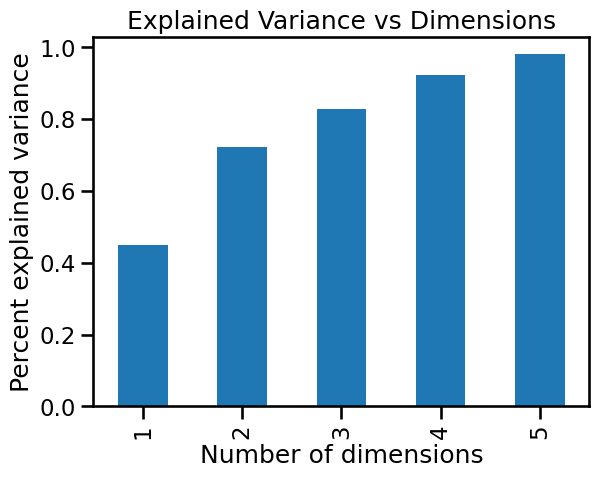

In [ ]:
sns.set_context('talk')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

And here's a plot of feature importances.

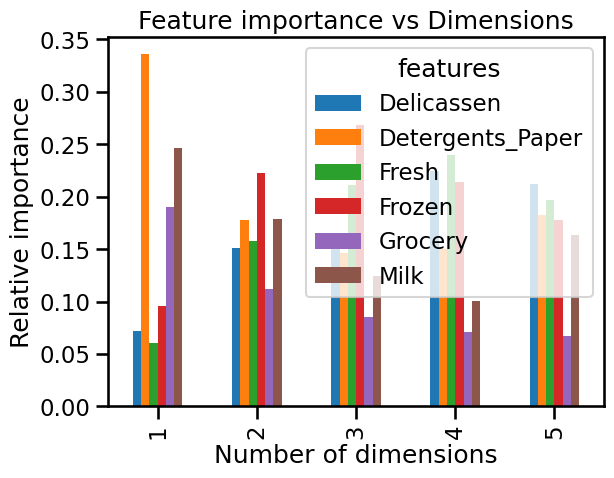

In [ ]:
ax = features_df.plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

Let us include the PCA in building the model using logistic regression and pipeline.

Load the dataset.

In [ ]:
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
df = pd.read_csv(filepath)

Create a pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df.drop('Activity', axis=1)
y = df.Activity
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Plot the average accuracy by number of dimensions.

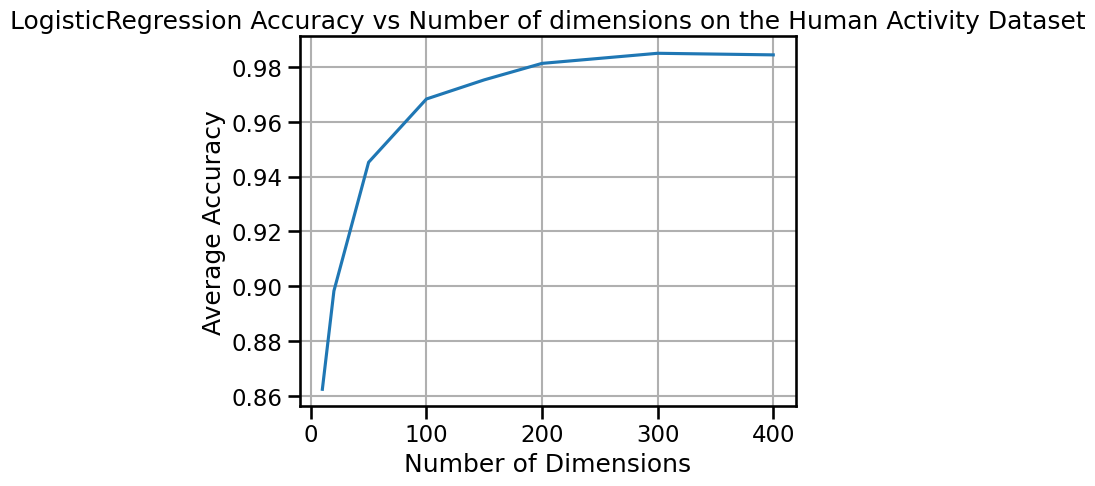

In [ ]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

Supplementary Activity:
* Choose your own dataset.
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables (if necessary).
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Use pipelining.
* Perform PCA
* Use logistic regression with PCA.
* Plot the average accuracy by number of dimensions.

In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

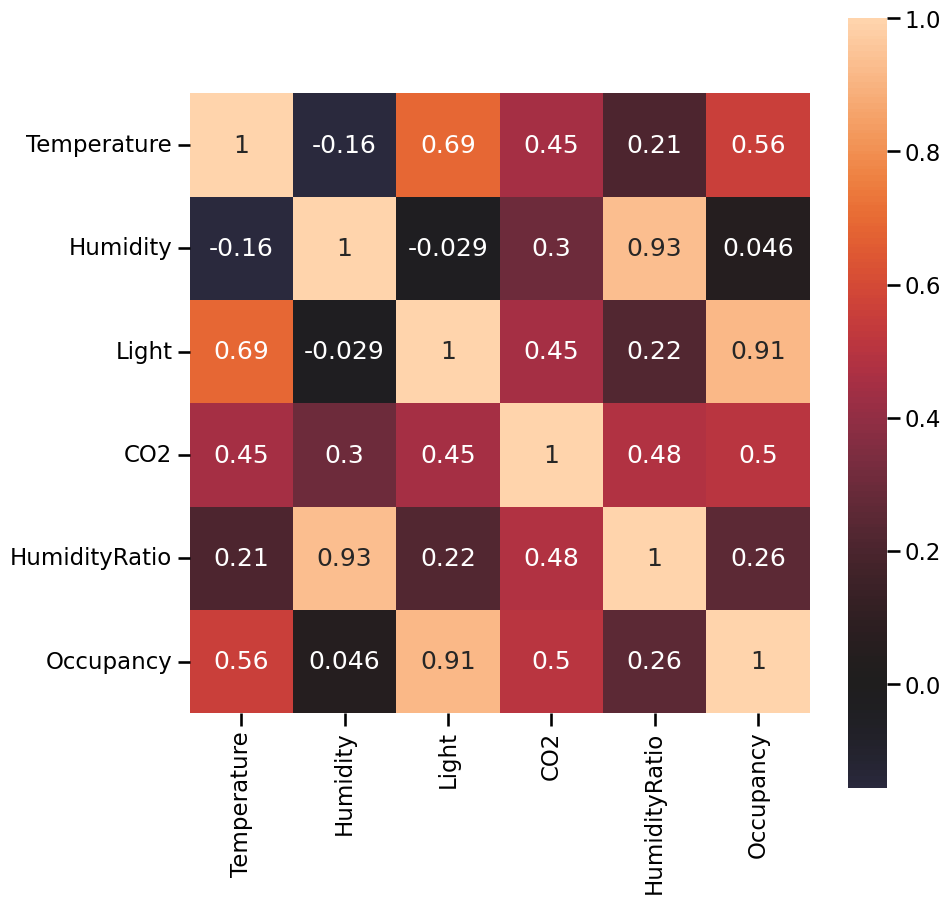

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Performing the standardization of features using pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
df_pipe = pipeline.fit_transform(df.drop('Occupancy',axis=1))
df_scaled = pd.DataFrame(df_pipe, columns=df.columns[:-1])
df_scaled

,Temperature,Light,CO2,HumidityRatio
0,0.881869,0.856980,0.368776,0.550205
1,0.884913,0.855411,0.377959,0.552440
2,0.886941,0.854074,0.385456,0.550465
3,0.885674,0.834175,0.389530,0.544843
4,0.890994,0.832768,0.392916,0.550844
...,...,...,...,...
19114,0.362930,0.815549,0.800737,0.405213
19115,0.372496,0.813584,0.804531,0.409764
19116,0.377270,0.813584,0.807387,0.411489
19117,0.377270,0.812071,0.850807,0.422715


In [ ]:
# Perform descriptive statistics such as mean, median and mode
df_scaled.describe()

,Temperature,Light,CO2,HumidityRatio
count,19119.000000,19119.000000,19119.000000,19119.000000
mean,0.386633,0.295490,0.279862,0.413217
std,0.198719,0.372569,0.235528,0.200548
min,0.000000,0.000000,0.000000,0.000000
25%,0.256733,0.000000,0.075027,0.279146
50%,0.358140,0.000000,0.203952,0.428020
75%,0.519867,0.808720,0.427675,0.569148
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_scaled.median()

,0
Temperature,0.358140
Light,0.000000
CO2,0.203952
HumidityRatio,0.428020


In [ ]:
df_scaled.mode().T

,0
Temperature,0.280730
Light,0.000000
CO2,0.036710
HumidityRatio,0.171929


In [ ]:
# Perform PCA for 1-4 features
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 5):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045


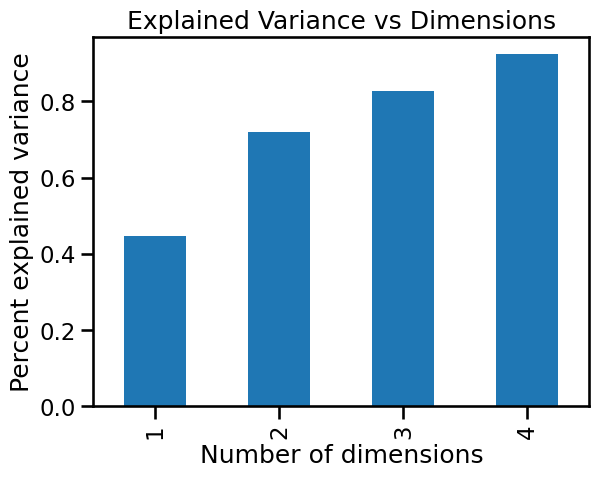

In [ ]:
# Plots the result of explained variance vs dimensions
sns.set_context('talk')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

# It can be noticed that as the amount of dimensions increase,
# the percent explained variance also increases

In [ ]:
# Use logistic regression with PCA
X = df_scaled
y = df['Occupancy']
sss = StratifiedShuffleSplit(n_splits=5, random_state=0)

def get_avg_score(n):
    pipe = [
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [1,2,3,4]
score_list = [get_avg_score(n) for n in ns]

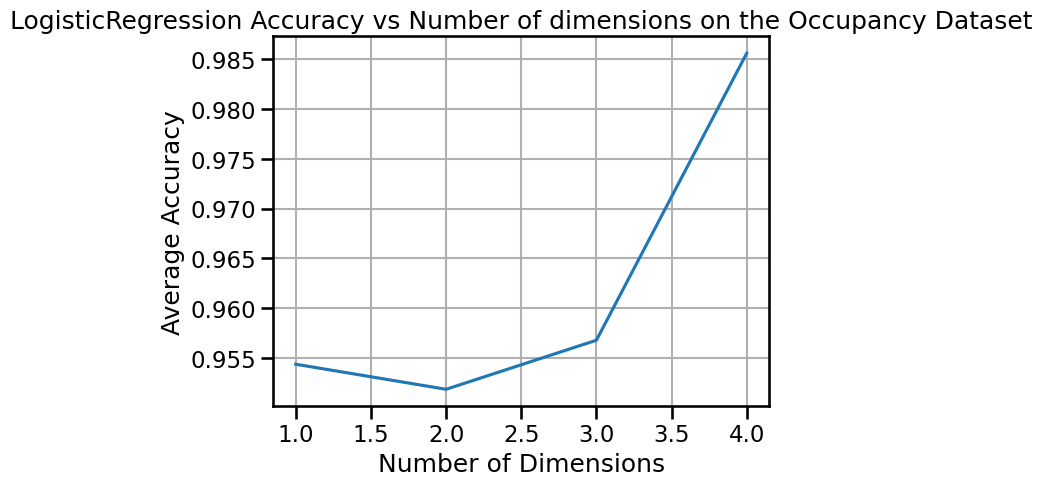

In [ ]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Occupancy Dataset')
ax.grid(True)

# The graph is opposite shaped with the Human Activity Dataset
# This might be due to the features being much less (around 500 vs 4)
# Which suggest that the logistic regression score can be improved with more features
# instead of lesser features

#### Conclusion

To conclude, Principal Component Analysis is a dimensionality reduction technique where we first find the best fitting regression line and then place new data in the line with the highest variance between these data. In the activity, we first performed the necessary preproccessing as PCA is sensitive to unscaled data. We then performed PCA itself for different n_components which stand for the amount of features we want to keep. We finally saw what it can do in another dataset, where the accuracy greatly increasing with an increased dimensions for the first few dimensions (around 100) but then the accuracy did not improve much with more dimensions (around 200).

As for the supplementary exercise, I am able to implement pipelines to simplify the preprocessing specifically the standardization of variables, and also in performing PCA with logistic regression. Although the result is different from the activity, it can still be inferred that PCA works better in datasets with many features as compared to my dataset which contained less features.